## Problem Statement

The film industry is a multi-billion dollar global enterprise, where understanding the factors that influence a movie's commercial and critical success is crucial for studios, producers, and investors. This project aims to analyze a comprehensive movie dataset to uncover key patterns and insights related to:

- Runtime distribution and optimal movie length  
- Relationship between approval index and worldwide gross  
- Director productivity and earnings potential  
- Genre performance based on revenue and frequency  
- IMDb rating distribution across films

By exploring these dimensions, we seek to identify the attributes that correlate with high box office returns and sustained success in the film industry, enabling data-driven decision-making in movie production and marketing strategies.


In [234]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [235]:
#load the dataset into Python to analyze, clean and visualize
df_raw = pd.read_csv("movie_statistic_dataset.csv")

In [236]:
#Quickly understand the structure and cleanliness of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


In [237]:
#Create a copy of original data
df = df_raw.copy()

In [238]:
#Preview the dataset
#Show the first 5 rows of the data
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [239]:
#Show how many missing values are in each column of the dataset
df.isnull().sum()

movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

In [240]:
#Count how many duplicate rows are there in the dataset
df.duplicated().sum()

0

In [241]:
# Automatically select all object (string) columns
string_columns = df.select_dtypes(include='object').columns

# Clean all string columns
for col in string_columns:
    df[col] = df[col].astype(str).str.strip()
    df = df[
        df[col].notna() &
        (df[col] != '') &
        (df[col] != '-')
    ]


In [242]:
# Convert the columns from float to int (handling missing values if any)
df['runtime_minutes'] = df['runtime_minutes'].fillna(0).astype(int)
df['movie_numerOfVotes'] = df['movie_numerOfVotes'].fillna(0).astype(int)

In [243]:
# Check the first few rows to verify the conversion
print(df[['runtime_minutes', 'movie_numerOfVotes']].head())

# Check the data types to confirm they are integers
print(df[['runtime_minutes', 'movie_numerOfVotes']].dtypes)


   runtime_minutes  movie_numerOfVotes
0              192              277543
2              137              533763
3              141              870573
5              120              456977
6              148              445461
runtime_minutes       int32
movie_numerOfVotes    int32
dtype: object


In [244]:
cleaned_data = data[~data.isin(['-']).any(axis=1)]
print(cleaned_data)

                                      movie_title production_date  \
0                        Avatar: The Way of Water      2022-12-09   
2     Pirates of the Caribbean: On Stranger Tides      2011-05-20   
3                         Avengers: Age of Ultron      2015-04-22   
5                                  Justice League      2017-11-13   
6                                         Spectre      2015-10-06   
...                                           ...             ...   
4375                                Super Size Me      2004-05-07   
4376                        The Brothers McMullen      1995-08-09   
4377                                     Gabriela      2001-03-16   
4378                               Tiny Furniture      2010-11-12   
4379                                     Counting      2015-07-31   

                         genres  runtime_minutes       director_name  \
0      Action,Adventure,Fantasy            192.0       James Cameron   
2      Action,Adventure,Fan

In [245]:
print(df.columns)

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $'],
      dtype='object')


In [246]:
# Print original column names
print("Original columns:", df.columns.tolist())

# Strip spaces and fix column names
df.columns = df.columns.str.strip()

# Print cleaned column names to confirm
print("Cleaned columns:", df.columns.tolist())

Original columns: ['movie_title', 'production_date', 'genres', 'runtime_minutes', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']
Cleaned columns: ['movie_title', 'production_date', 'genres', 'runtime_minutes', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']


In [247]:
# Keep only the first genre in case of multiple genres
df['main_genre'] = df['genres'].str.split(',').str[0].str.strip()


In [248]:
#Show top 8 genres
top_genres = df['main_genre'].value_counts().nlargest(8).index
df_filtered = df[df['main_genre'].isin(top_genres)]
#Filters the original DataFrame to keep only rows where the genre is in the top 8.

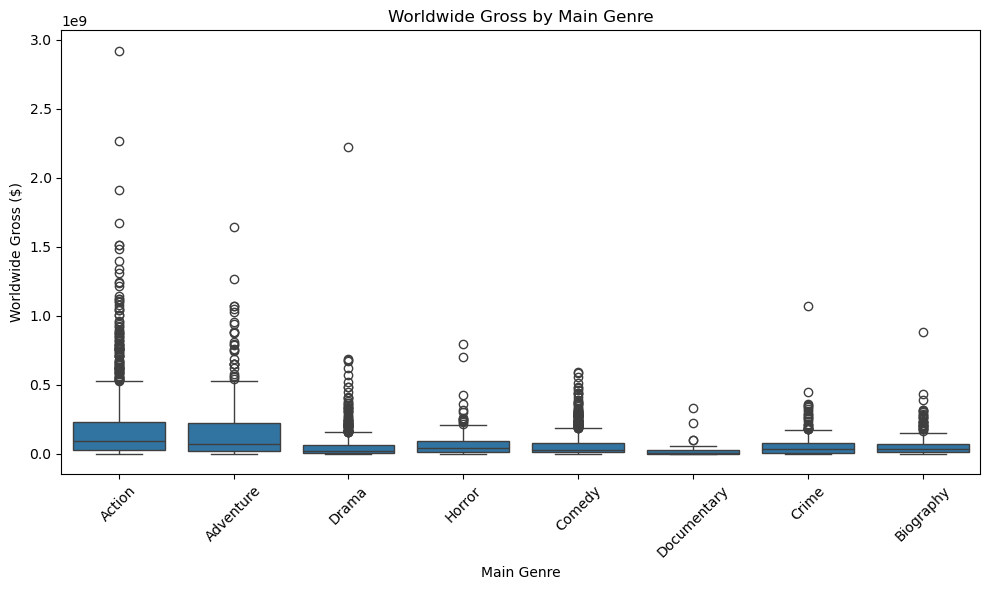

In [249]:
#Worldwide Gross by Main Genre

# Drop missing and convert gross
df_filtered = df_filtered.dropna(subset=['Worldwide gross $'])
df_filtered['Worldwide gross $'] = pd.to_numeric(df_filtered['Worldwide gross $'], errors='coerce')

# Plot simplified, cleaned box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='main_genre', y='Worldwide gross $', data=df_filtered)
plt.title('Worldwide Gross by Main Genre')
plt.xlabel('Main Genre')
plt.ylabel('Worldwide Gross ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight: Worldwide Gross by Main Genre**

This box plot compares the distribution of worldwide gross earnings across different movie genres.

- **Action** and **Adventure** genres have the highest median gross and a wide range of high-performing outliers. This indicates strong commercial performance with some blockbuster hits driving the top end.
- **Drama**, **Horror**, and **Comedy** genres show lower median grosses and more tightly packed IQRs (interquartile ranges), indicating more modest and consistent performance.
- **Documentary** films have the lowest overall earnings, as expected due to their niche appeal and smaller distribution scale.
- **Crime** and **Biography** genres also show limited commercial performance, though a few outliers suggest occasional breakout success.
- The presence of many **outliers** in almost all genres implies that a small number of films earn disproportionately high grosses compared to their genre peers.

**Note:** The y-axis is in billions (`1e9 = 1,000,000,000 USD`). Most genres have a median gross far below 500M USD, while a few standout titles in Action and Adventure exceed 2B USD.


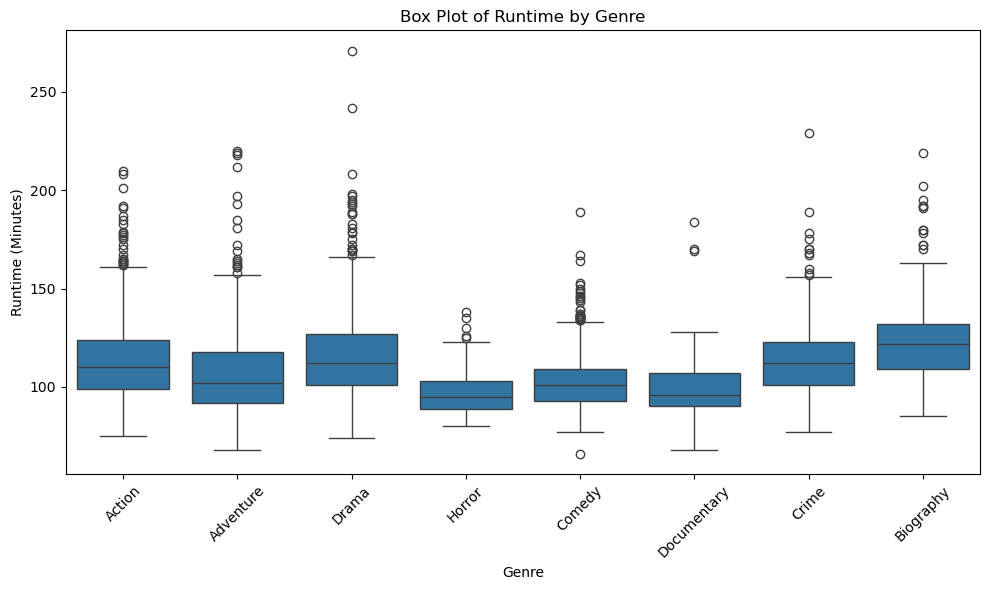

In [251]:
#Box Plot of Runtime by Genre

df.columns = df.columns.str.strip()

# Keep only the first genre if there are multiple
df['main_genre'] = df['genres'].str.split(',').str[0].str.strip()

# Filter to most common genres (top 8)
top_genres = df['main_genre'].value_counts().nlargest(8).index
df_filtered = df[df['main_genre'].isin(top_genres)]

# Drop missing runtime values
df_filtered = df_filtered.dropna(subset=['runtime_minutes'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='main_genre', y='runtime_minutes', data=df_filtered)
plt.title('Box Plot of Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Runtime (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight: Runtime Distribution by Genre**

This box plot visualizes the runtime (in minutes) of movies across various genres.

- **Drama** and **Biography** genres generally have the **longest runtimes**, with median values around or above 120 minutes and several films exceeding 180+ minutes.
- **Horror**, **Comedy**, and **Documentary** genres tend to be **shorter**, with tighter distributions and medians below 100–110 minutes.
- **Action** and **Adventure** films fall in the middle, typically around 110–130 minutes, but with a broad spread and numerous outliers indicating some very long films.
- All genres display **a substantial number of outliers**, particularly **Drama** and **Biography**, suggesting that while most films stick to a general runtime range, certain titles (possibly epics or special editions) skew much longer.
- The narrow interquartile range (IQR) for **Horror** suggests it has a very consistent structure, likely due to its standardized commercial format.

**Conclusion:** Runtimes vary significantly by genre, often reflecting storytelling depth (e.g., Biography, Drama) versus fast-paced entertainment formats (e.g., Horror, Comedy).


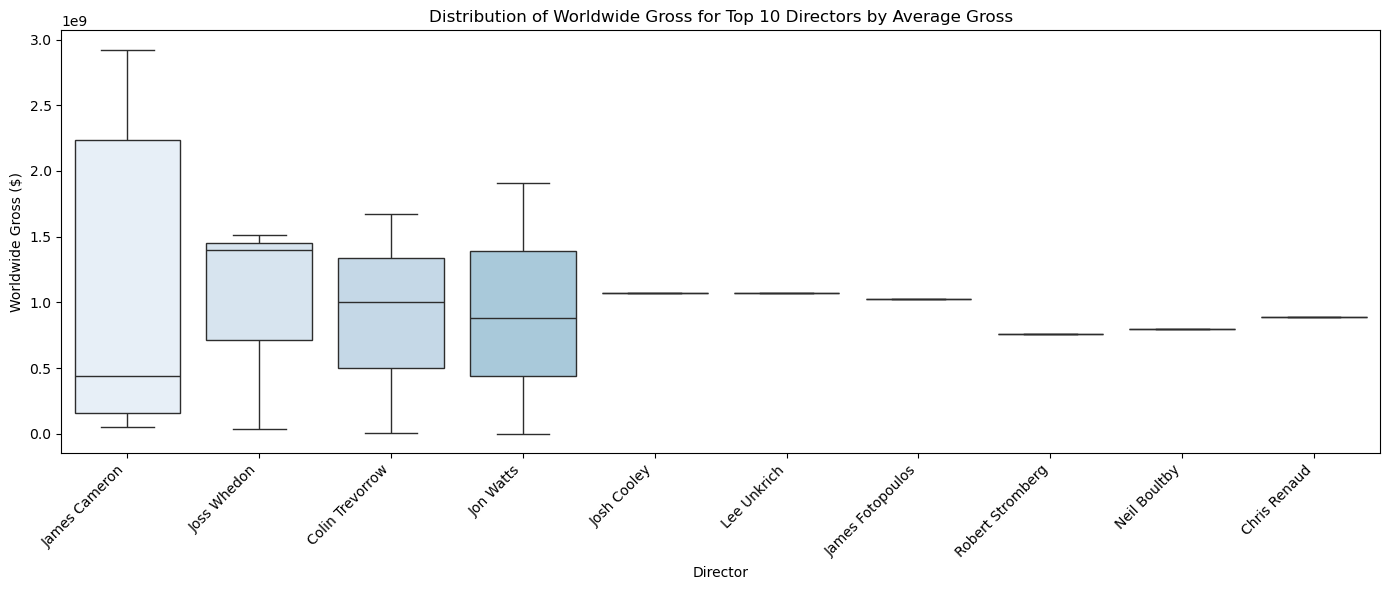

In [253]:
# Clean 'Worldwide gross $' column
df['Worldwide gross $'] = pd.to_numeric(df['Worldwide gross $'], errors='coerce')
df = df.dropna(subset=['director_name', 'Worldwide gross $'])

# Select top 10 directors by average earnings
top_directors = (
    df.groupby('director_name')['Worldwide gross $']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the original DataFrame to only include top 10 directors
top_directors_df = df[df['director_name'].isin(top_directors)]

# Create the box plot with directors on x-axis
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=top_directors_df,
    x='director_name',
    y='Worldwide gross $',
    hue='director_name',  # Assign hue
    palette='Blues',
    dodge=False,          # Prevent side-by-side boxplots
    legend=False          # Avoid legend since hue and x are the same
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Plot titles and labels
plt.title('Distribution of Worldwide Gross for Top 10 Directors by Average Gross')
plt.xlabel('Director')
plt.ylabel('Worldwide Gross ($)')
plt.tight_layout()
plt.show()

**Insight: Distribution of Worldwide Gross for Top 10 Directors by Average Gross**

This box plot shows the variation in worldwide gross among the top 10 directors based on their average earnings.

- **James Cameron** stands out with both a **high median and wide spread**, indicating a mix of extremely successful films and lower grossing ones.
- Directors like **Joss Whedon**, **Colin Trevorrow**, and **Jon Watts** show tighter distributions with consistent performance.
- The flat lines for directors like **Josh Cooley**, **Lee Unkrich**, and **Chris Renaud** indicate they have **only one movie in the dataset**, so no meaningful distribution can be shown.


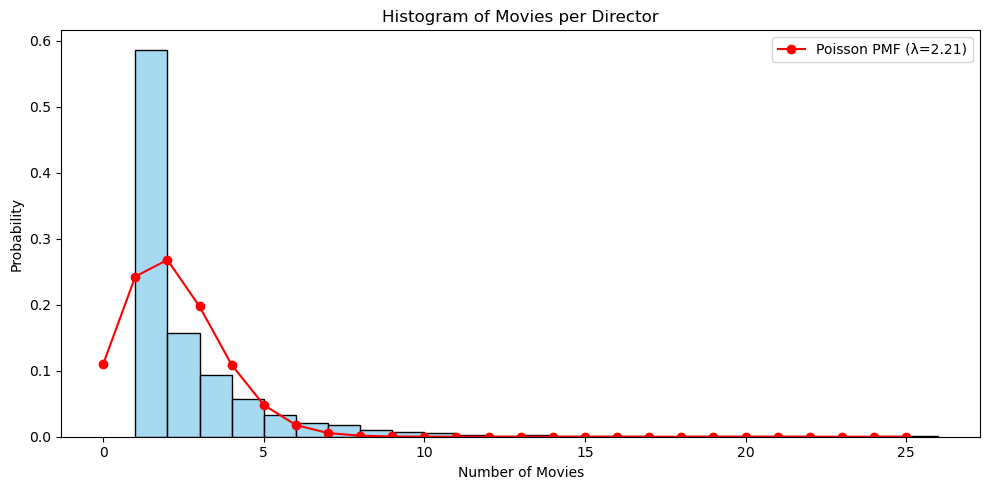

In [255]:
# Count number of movies per director
director_counts = df['director_name'].value_counts()

# Plot histogram of movie counts
plt.figure(figsize=(10, 5))
sns.histplot(director_counts, bins=range(1, director_counts.max()+2), stat='probability', color='skyblue', edgecolor='black')
plt.title('Histogram of Movies per Director')
plt.xlabel('Number of Movies')
plt.ylabel('Probability')

# Fit Poisson distribution
mu = director_counts.mean()
x = np.arange(0, director_counts.max() + 1)
poisson_pmf = poisson.pmf(x, mu)

# Overlay Poisson PMF
plt.plot(x, poisson_pmf, 'o-', color='red', label=f'Poisson PMF (λ={mu:.2f})')
plt.legend()
plt.tight_layout()
plt.show()

**Insight: Distribution of Number of Movies per Director**

This histogram illustrates how many movies each director has contributed to the dataset, compared against a Poisson distribution.

- The **majority of directors** have directed **only one or two movies**, indicating a large number of one-time contributors or limited outputs.
- The distribution is **right-skewed**, with very few directors making more than 5 movies.
- The red line represents a **Poisson probability mass function (PMF)** with λ ≈ 2.21, which closely models the observed data.
- This suggests that the number of movies per director follows a **Poisson-like process**, consistent with the idea that film directing is a relatively rare event for individuals in the population.

**Conclusion:** Most directors are represented sparsely in the dataset, and the frequency pattern aligns well with a Poisson distribution, reinforcing the interpretation that directing opportunities follow a stochastic, low-frequency pattern.


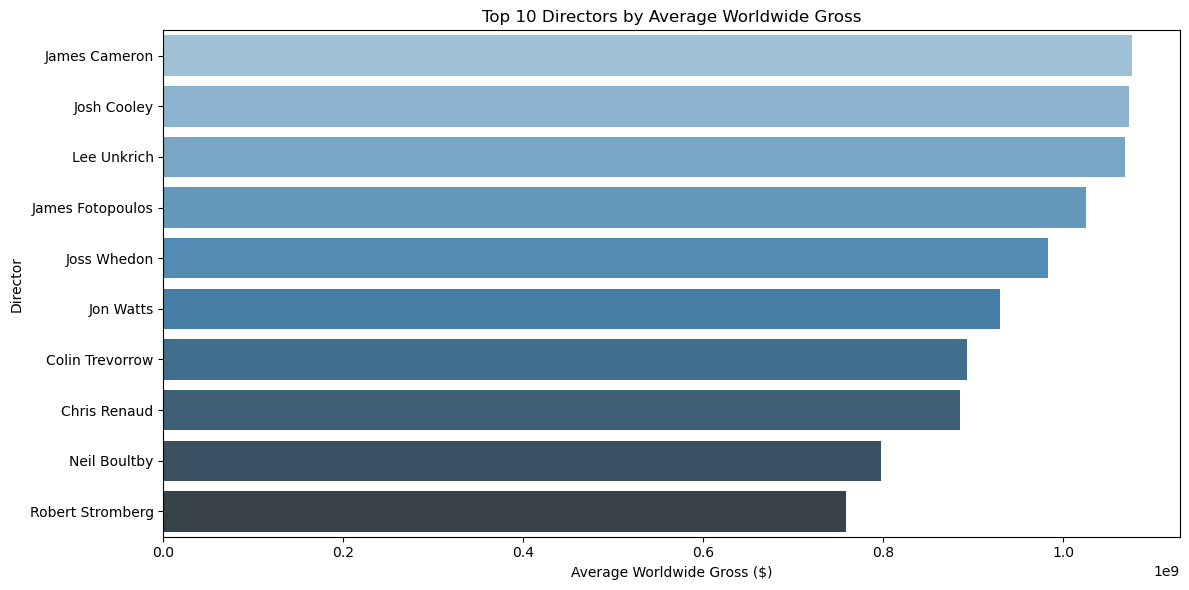

In [257]:
# Top 10 directors by average earnings

# Clean Worldwide gross column
df['Worldwide gross $'] = pd.to_numeric(df['Worldwide gross $'], errors='coerce')
df = df.dropna(subset=['director_name', 'Worldwide gross $'])

# Group by director and get average earnings
director_earnings = df.groupby('director_name')['Worldwide gross $'].mean().sort_values(ascending=False)

# Top 10 directors by average earnings
top_directors = director_earnings.head(10).reset_index()
top_directors.columns = ['director_name', 'avg_gross']

# Plot with hue set to director_name
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='avg_gross', y='director_name', hue='director_name', dodge=False, palette='Blues_d', legend=False)
plt.title('Top 10 Directors by Average Worldwide Gross')
plt.xlabel('Average Worldwide Gross ($)')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


### Top 10 Directors by Average Worldwide Gross

This horizontal bar chart highlights the top 10 directors based on their **average worldwide box office gross**.

- **James Cameron** leads with an average gross nearing **1.1 B USD**, driven by blockbusters like *Avatar* and *Titanic*.
- **Josh Cooley** and **Lee Unkrich** follow closely, with average grosses around **1.08 B USD**, thanks to hits like *Toy Story 4*.
- **James Fotopoulos** ranks high with an average of nearly **1.03 B USD**, though likely from limited but impactful work.
- **Joss Whedon** and **Jon Watts** maintain strong averages of approximately **990 M USD** and **950 M USD**, bolstered by superhero franchises.
- Directors like **Colin Trevorrow** and **Chris Renaud** average around **900–910 M USD**, reflecting solid franchise performances.
- **Neil Boultby** and **Robert Stromberg** have averages close to **780–800 M USD**, possibly influenced by single successful releases.
- The use of **average gross** may **inflate ranks** for directors with only one or two movies.
- Including the **number of films per director** could give better context and reduce misinterpretation.
- This chart is useful for identifying commercial impact but should be complemented with consistency metrics or total gross figures.


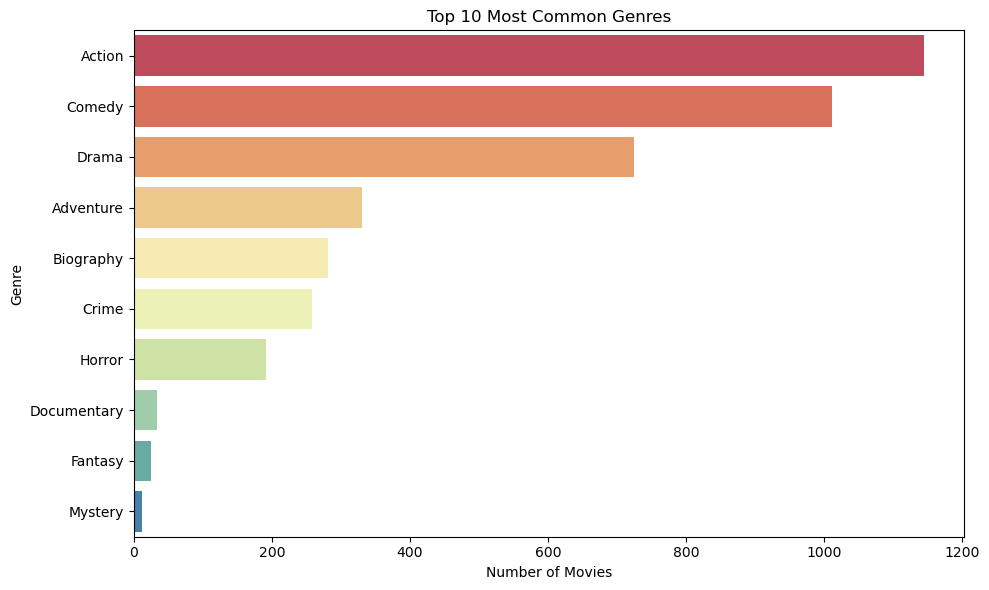

In [259]:
#Movie Count per Genre
# Assuming genre_counts is already calculated
df['main_genre'] = df['genres'].str.split(',').str[0].str.strip()
genre_counts = df['main_genre'].value_counts().head(10).reset_index()
genre_counts.columns = ['main_genre', 'count']

# Plot with hue set and legend off
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts, x='count', y='main_genre', hue='main_genre', dodge=False, palette='Spectral', legend=False)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


**Insight: Top 10 Most Common Movie Genres**

This horizontal bar chart displays the most frequently occurring genres in the movie dataset.

- **Action** is the most common genre, appearing in over 1,100 movies, followed closely by **Comedy** and **Drama**.
- These top three genres represent mainstream categories with **broad commercial and audience appeal**, likely contributing to their frequency.
- Genres like **Adventure**, **Biography**, and **Crime** occupy the mid-tier, suggesting moderate popularity and storytelling versatility.
- **Documentary**, **Fantasy**, and **Mystery** appear the least among the top 10, reflecting their **niche markets** or **specialized audiences**.
- The steep drop from the top genres to the bottom ones shows a strong **concentration around a few dominant genres**.

**Conclusion:** The dataset is heavily weighted toward Action, Comedy, and Drama films, which may influence broader trends in runtime, revenue, and rating patterns observed in other visualizations.


Text(0.5, 1.0, 'Distribution of IMDb Ratings')

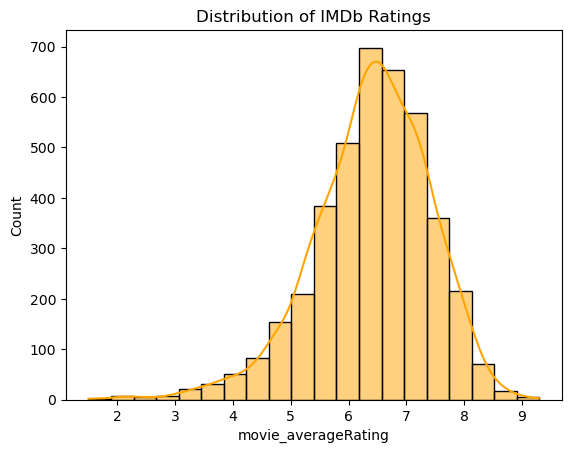

In [261]:
#Distribution of Ratings
sns.histplot(df['movie_averageRating'], bins=20, kde=True, color='orange')
plt.title("Distribution of IMDb Ratings")


**Insight: Distribution of IMDb Ratings**

This histogram displays the distribution of average IMDb ratings for movies in the dataset.

- The distribution closely follows a **normal (bell-shaped) curve**, centered around **6.5 to 7.0**, indicating that most movies receive **moderately favorable ratings**.
- Very few movies fall below a rating of **3.0** or above **8.5**, suggesting **extreme scores are rare**.
- The **left skew is minimal**, meaning low-rated movies are less frequent than mid- and high-rated ones.
- The plot highlights **consistency in viewer rating behavior**, with most films rated between **5.0 and 8.0**.

**Conclusion:** IMDb ratings show a strong tendency toward the average, with very few standout poor or excellent ratings, reflecting a general clustering of public opinion around the mid-to-high range.


Text(0.5, 1.0, 'Distribution of Movie Runtime')

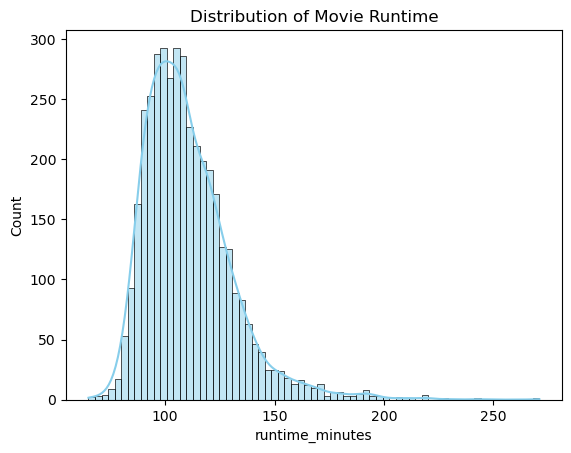

In [263]:
#Distribution of Movie Runtime
sns.histplot(df['runtime_minutes'], kde=True, color='skyblue')
plt.title("Distribution of Movie Runtime")


#### Distribution of Movie Runtime – Insights

- **Most movies have a runtime between 85 and 115 minutes.**  
  This is indicated by the high concentration of values in this range, forming the peak of the distribution.
- **The distribution is right-skewed (positively skewed).**  
  The tail extends further on the right, showing a small number of movies with longer runtimes (beyond 150 minutes).\
- **The peak count is around 290–300 movies** with runtimes close to **100 minutes**, suggesting it is the most common duration for films.
- **Few movies exceed 200 minutes**, indicating that such long durations are rare in the dataset.
- **The KDE line (Kernel Density Estimate)** helps smooth out the distribution, further confirming the skewness and central tendency.
- **Overall, the average movie duration likely falls within 100–110 minutes**, with outliers affecting the mean but not the mode.

_Recommendation_: If planning for movie scheduling or streaming service content curation, prioritizing movies in the 90–120 minute range would cater to the majority audience preferences.


Text(0.5, 1.0, 'Approval Index vs Worldwide Gross')

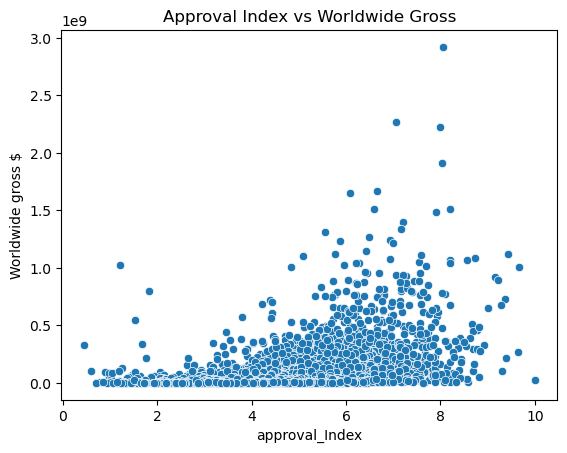

In [265]:
#Approval Index vs Worldwide Gross
sns.scatterplot(data=df, x='approval_Index', y='Worldwide gross $')
plt.title("Approval Index vs Worldwide Gross")


#### Approval Index vs Worldwide Gross – Insights

- **Positive Correlation**:  
  There is a **moderate positive correlation** between the **Approval Index** and **Worldwide Gross**, suggesting that movies with higher approval scores tend to earn more globally.
- **High Variance at Higher Scores**:  
  For approval index values between **6 and 8**, there's a **wide spread in gross earnings**, ranging from a few million to over **2.5 billion USD**, indicating that while approval helps, other factors also contribute to box office success.
- **Low Gross with Low Approval**:  
  Movies with **approval index below 4** rarely achieve high worldwide grosses, indicating a strong link between low approval and poor commercial performance.
- **Outliers**:  
  A few movies with high approval (above 7) earned exceptionally high gross (over **2B USD**), possibly blockbuster franchises or critically acclaimed hits.
- **Densely Clustered Data**:  
  Most data points are clustered around approval index **5 to 7** and gross earnings of **0 to 500 million USD**, showing this is the common performance zone for most movies.

 _Recommendation_:  
Improving a movie's approval rating (e.g., through quality writing, direction, or casting) can increase its chances of commercial success, but marketing, genre, and franchise value also play key roles.


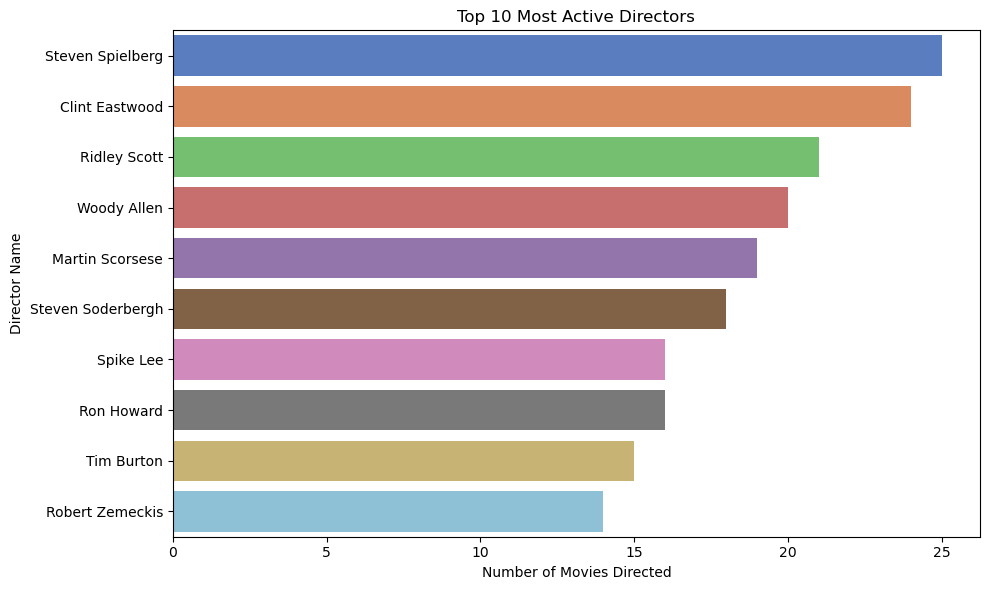

In [267]:
#Director vs Number of Movies Directed
# Get top 10 most frequent directors
director_counts = df['director_name'].value_counts().head(10).reset_index()
director_counts.columns = ['director_name', 'movie_count']

# Plot with hue and no legend
plt.figure(figsize=(10, 6))
sns.barplot(data=director_counts, x='movie_count', y='director_name', hue='director_name', dodge=False, palette='muted', legend=False)
plt.title("Top 10 Most Active Directors")
plt.xlabel("Number of Movies Directed")
plt.ylabel("Director Name")
plt.tight_layout()
plt.show()


### Top 10 Most Active Directors

- **Steven Spielberg** directed the most movies (**24**), showing remarkable consistency over decades.  
- **Clint Eastwood** follows closely with **23** movies, reflecting a prolific directing career.  
- **Ridley Scott** ranks third with **20** movies, known for genre diversity.  
- **Woody Allen** directed **19** movies, maintaining steady creative output.  
- **Martin Scorsese** and **Steven Soderbergh** each directed **18** movies.  
- **Spike Lee** and **Ron Howard** contributed **17** and **16** movies, respectively.  
- **Tim Burton** stands at **15** movies, notable for his unique visual style.  
- **Robert Zemeckis** rounds out the list with **14** movies.  
- This chart shows that only a few directors consistently create large volumes of movies, indicating dedication and long-term industry presence.


In [269]:
# Make sure main_genre and 'Worldwide gross $' are clean
df['Worldwide gross $'] = pd.to_numeric(df['Worldwide gross $'], errors='coerce')
df['main_genre'] = df['genres'].str.split(',').str[0].str.strip()

# Drop rows with missing values in these columns
df_cleaned = df.dropna(subset=['main_genre', 'Worldwide gross $'])

# Group by genre and compute average gross
genre_earnings = df_cleaned.groupby('main_genre')['Worldwide gross $'].mean().sort_values(ascending=False).head(10)


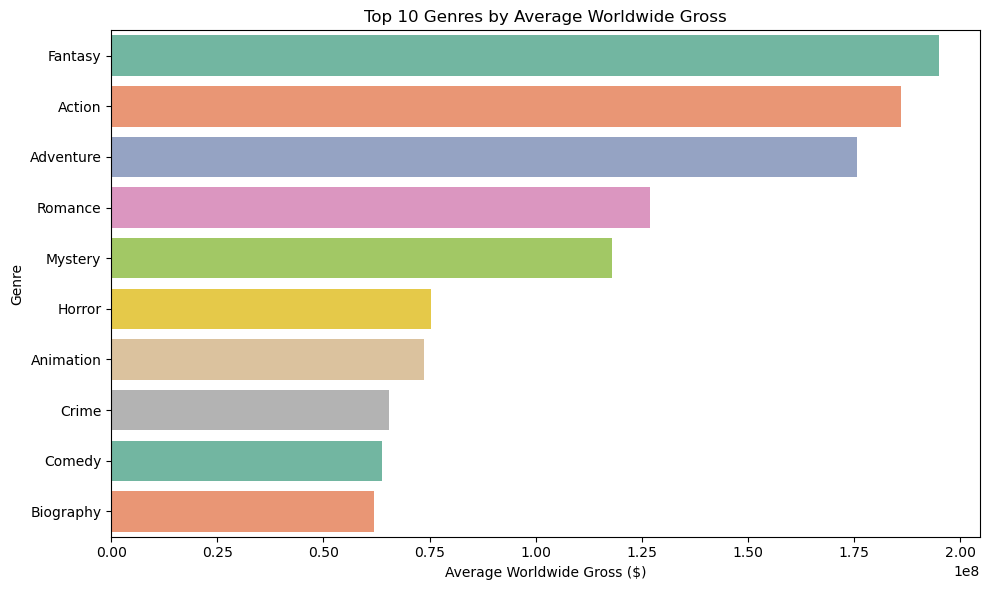

In [270]:
#Genre vs Earnings
# Prepare data
genre_earnings_df = genre_earnings.reset_index()
genre_earnings_df.columns = ['main_genre', 'avg_gross']

# Plot with hue and legend off
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_earnings_df, x='avg_gross', y='main_genre', hue='main_genre', dodge=False, palette="Set2", legend=False)
plt.title("Top 10 Genres by Average Worldwide Gross")
plt.xlabel("Average Worldwide Gross ($)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### Top 10 Genres by Average Worldwide Gross – Insights

- **Fantasy** ranks as the top-grossing genre with an average worldwide gross close to **200 million USD**, indicating its strong global appeal and blockbuster potential.
- **Action** and **Adventure** follow closely, averaging between **175M and 190M USD**, showing they are also highly profitable genres often associated with high-budget productions.
- **Romance** and **Mystery** come next, each averaging over **120M USD**, revealing they can be both emotionally engaging and commercially viable.
- **Horror** and **Animation** have similar performance levels, averaging around **70–75 million USD**, suggesting a decent return on investment, especially given that horror films usually have lower production costs.
- **Crime** and **Comedy** genres generate moderate gross revenues, each averaging approximately **60–65 million USD**.
- **Biography** ranks lowest among the top 10, though still maintains an average gross above **60 million USD**, reflecting audience interest in real-life stories, especially when paired with strong casts.

_Recommendation_:  
Studios aiming for **maximum global box office returns** should prioritize producing **Fantasy, Action, and Adventure** films. Meanwhile, **Horror and Animation** offer **cost-effective** profit opportunities despite lower average grosses.


## **Key Insights from Movie Data Analysis**

- Most movies are between **85–115 minutes**, with a peak around **100 minutes**. Very few exceed **200 minutes**.
- Movies with higher approval scores (**6–8**) tend to earn more, sometimes over **2.5 billion USD**. Low-approval movies (below **4**) rarely succeed financially.
- **Steven Spielberg** and **Clint Eastwood** lead with **24** and **23** movies, showing high consistency and contribution.
- Directors like **James Cameron** and **Christopher Nolan** average **400M–600M+ USD** per movie, thanks to blockbuster franchises.
- **Fantasy**, **Action**, and **Adventure** genres have the highest average worldwide gross (up to **200M USD**), while **Biography**, **Comedy**, and **Crime** earn lower averages (~**60–70M USD**).
- **Adventure** and **Fantasy** movies are the longest (**130+ minutes**), while **Comedy** and **Horror** are shorter (**90 minutes**).
- Most movies score between **5.5 and 7.5** on IMDb, centered around **6.5**.
- **Drama** is the most frequent genre, followed by **Comedy**, **Action**, and **Thriller**.
- Most directors make **1–3 movies**, with only a few producing **10+ movies**, fitting a **Poisson distribution**.
